In [1]:
import sys
import os 

sys.path.append(os.path.abspath('../src'))  

In [2]:
import pandas as pd
import numpy as np
import metrics as M
import viz as v
from scipy import stats 

In [3]:
df = pd.read_csv("../data/health_study_dataset.csv")

In [4]:
statistics = M.statistik(df)
print("Statistics:")
statistics

Statistics:


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


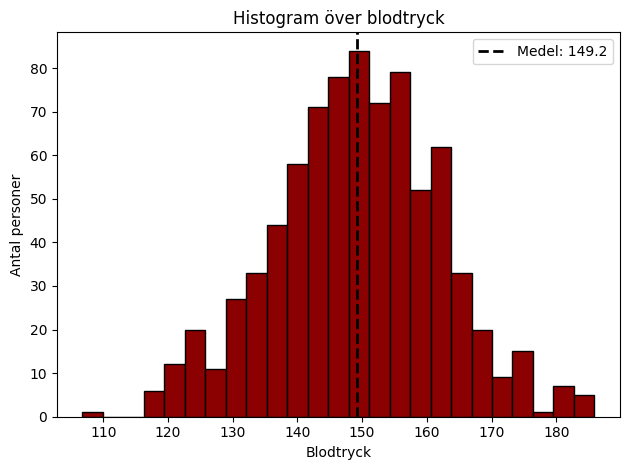

In [5]:
v.hist_blodtryck(df)

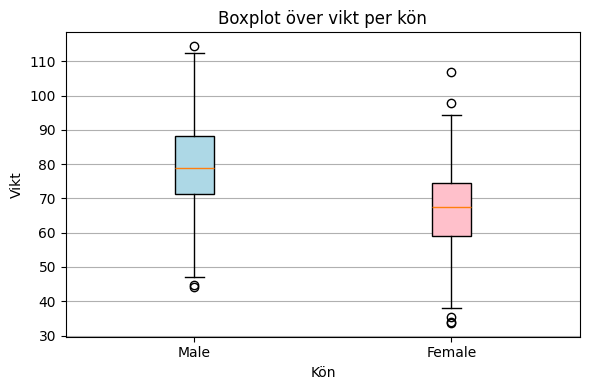

In [6]:
v.box_sex_weight(df)

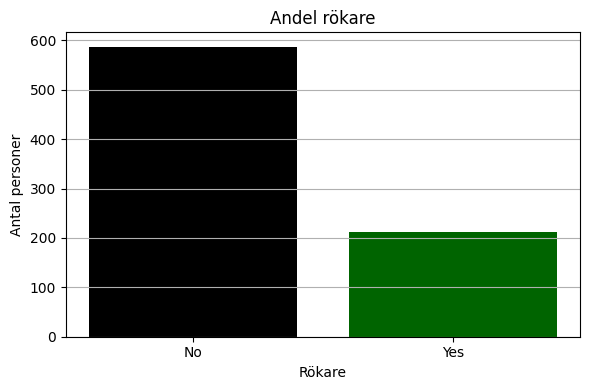

In [7]:
v.bar_smokers(df)

In [8]:
counts = M.sick_ones(df)
print(f"Andelen personer som har en sjukdom:" , counts) 

Andelen personer som har en sjukdom: 47


In [9]:
simulated_disease, sim_dis, disease_count,people_quantity = M.disease_sim(df)
print(f"Verklig andel sjuka i datasetet: {disease_count:.3f}")
print(f"Simulerad andel sjuka: {simulated_disease:.3f}")
print(f"Skillnaden: {simulated_disease - disease_count:.3f}")


Verklig andel sjuka i datasetet: 0.059
Simulerad andel sjuka: 0.056
Skillnaden: -0.003


In [10]:
lo, hi = M.ci_systolic_bp(df)
print(f"95% CI med normalapproximation: [{lo:.2f} , {hi:.2f}]")


95% CI med normalapproximation: [148.29 , 150.07]


In [11]:
blo, bhi, bmean = M.ci_systolic_bp_bootstrap(df, B=3000)
print(f"95% CI med bootstrapmetoden: {[blo, bhi, bmean]}")


95% CI med bootstrapmetoden: [148.339125, 150.08880625, 149.178625]


In [12]:
true_mean = M.true_mean(df)
true_mean

149.178625

In [13]:
rokare, ickerokare, t_stat, p_value, t_stat_w, p_value_w = M.hypotesprövning(df)
print(f"Standard t-test: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Welch    t-test: t = {t_stat_w:.3f}, p = {p_value_w:.4f}")


Standard t-test: t = 0.461, p = 0.6450
Welch    t-test: t = 0.450, p = 0.6527


## Resultat - Hypotesprövning ”Rökare har högre medel-blodtryck än icke-rökare.”: 
 I denna hypotesprövningen visade t-testet att det finns inte signikant skillnad i systolisk blodtryck mellan båda grupperna (rökare och ickerökare). 

Standard t-test: t = 0.461, p = 0.6450

Welch    t-test: t = 0.450, p = 0.6527

Hypotesen stöds inte av datan, då p-värdena är större än 0,05 och det finns ingen signifikant skillnad mellan grupperna.